In [9]:
import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [10]:

# Setup environment

env = gym.make("CartPole-v1")
obs_dim = env.observation_space.shape[0]
n_actions = env.action_space.n


class PolicyNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(PolicyNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, 32)
        self.output = nn.Linear(32, output_dim)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        return torch.softmax(self.output(x), dim=-1)

In [11]:
# Initialize network
agent = PolicyNet(obs_dim, n_actions)
optimizer = optim.Adam(agent.parameters(), lr=0.01)
def reinforce_update(reward_seq, log_prob_seq, optimizer):
    total_reward = sum(reward_seq)
    policy_loss = -torch.mean(torch.stack(log_prob_seq) * (total_reward - 15))
    optimizer.zero_grad()
    policy_loss.backward()
    optimizer.step()


In [12]:

# Train the policy

episode_rewards = []
for ep in range(200):
    state, _ = env.reset()
    done = False
    ep_rewards, ep_log_probs = [], []

    while not done:
        state_t = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        action_probs = agent(state_t)
        action = torch.multinomial(action_probs, 1).item()
        log_prob = torch.log(action_probs[0, action])

        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        ep_rewards.append(reward)
        ep_log_probs.append(log_prob)
        state = next_state

    reinforce_update(ep_rewards, ep_log_probs, optimizer)
    episode_rewards.append(sum(ep_rewards))

    print(f"Episode {ep+1:3d} | Total Reward: {sum(ep_rewards):6.2f}")

Episode   1 | Total Reward:  26.00
Episode   2 | Total Reward:  13.00
Episode   3 | Total Reward:  12.00
Episode   4 | Total Reward:  15.00
Episode   5 | Total Reward:  11.00
Episode   6 | Total Reward:  12.00
Episode   7 | Total Reward:  11.00
Episode   8 | Total Reward:  10.00
Episode   9 | Total Reward:  12.00
Episode  10 | Total Reward:  13.00
Episode  11 | Total Reward:  13.00
Episode  12 | Total Reward:  21.00
Episode  13 | Total Reward:  27.00
Episode  14 | Total Reward:  17.00
Episode  15 | Total Reward:  20.00
Episode  16 | Total Reward:  20.00
Episode  17 | Total Reward:  11.00
Episode  18 | Total Reward:  16.00
Episode  19 | Total Reward:  16.00
Episode  20 | Total Reward:  13.00
Episode  21 | Total Reward:  25.00
Episode  22 | Total Reward:  13.00
Episode  23 | Total Reward:  17.00
Episode  24 | Total Reward:  12.00
Episode  25 | Total Reward:  17.00
Episode  26 | Total Reward:  16.00
Episode  27 | Total Reward:  14.00
Episode  28 | Total Reward:  27.00
Episode  29 | Total 

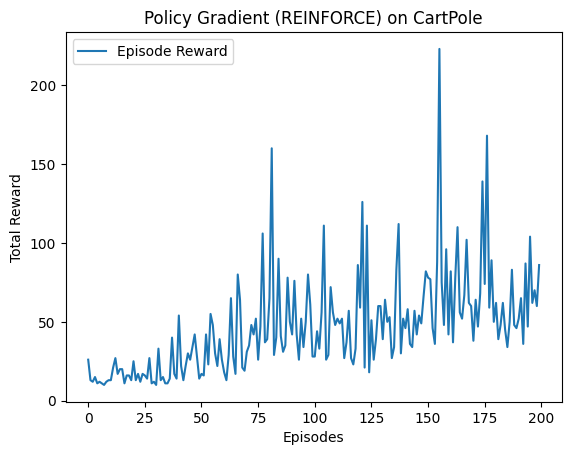

In [13]:

# Plot performance curve

plt.plot(episode_rewards, label="Episode Reward")
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Policy Gradient (REINFORCE) on CartPole")
plt.legend()
plt.show()
